# Plot/compute various metrics (confusion matrices, ROC curves, ...)

Using Sara's visualization code.

In [12]:
import os
import pandas as pd
from matplotlib import pyplot
CLASSIFIER_RESULTS_LOC = "output/classifier-results/"
%run "../scripts/cf_matrix.py"

In [20]:
def get_vals(filename):
    mets = pd.read_csv(os.path.join(CLASSIFIER_RESULTS_LOC, filename), sep="\t", index_col=0)
    mvs = mets["Count"]
    tp = mvs["TP"]
    fp = mvs["FP"]
    tn = mvs["TN"]
    fn = mvs["FN"]   
    return tp, fp, tn, fn

def get_accs(tp, fp, tn, fn):
    acc = (tp + tn) / (tp + fp + tn + fn)
    
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    bacc = (tpr + tnr) / 2
    
    return acc, bacc

## Confusion matrices

codacore-amalgam-data.tsv


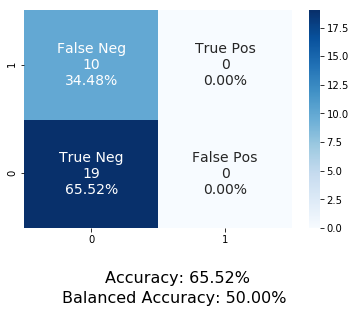

codacore-balance0-data.tsv


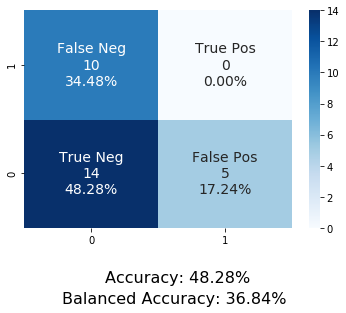

codacore-balance1-data.tsv


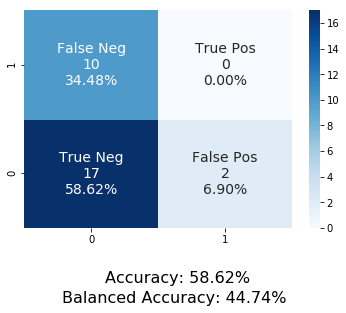

codacore-balance2-data.tsv


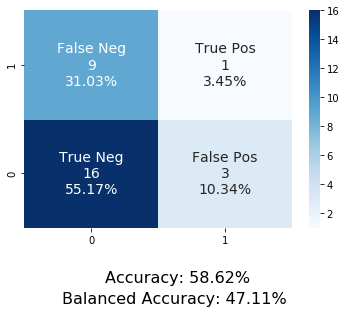

codacore-balance3-data.tsv


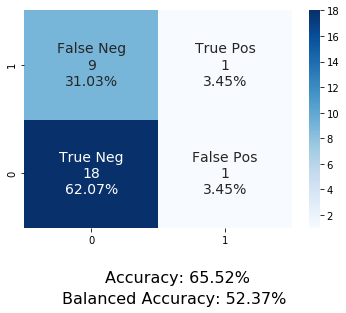

codacore-balance4-data.tsv


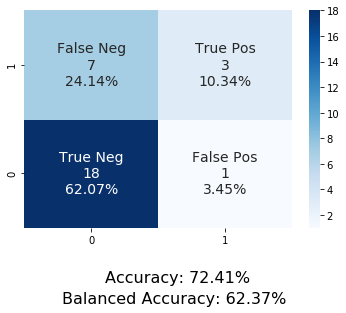

limma-1000ftrs-data.tsv


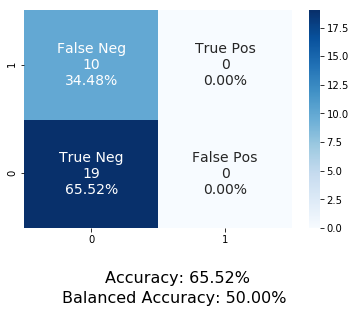

limma-100ftrs-data.tsv


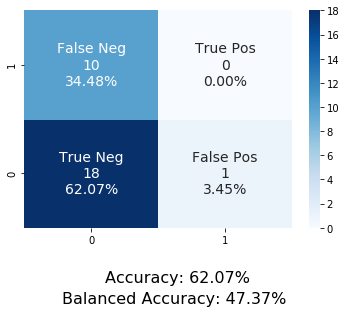

limma-20ftrs-data.tsv


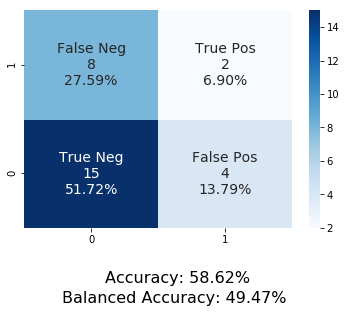

limma-5ftrs-data.tsv


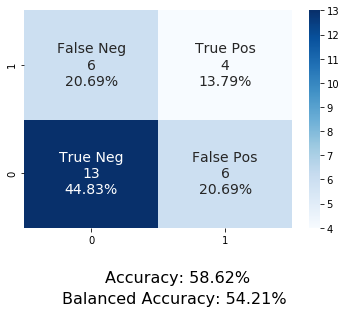

logreg-750-p0.01.tsv


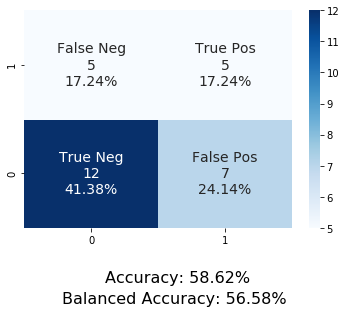

logreg-750.tsv


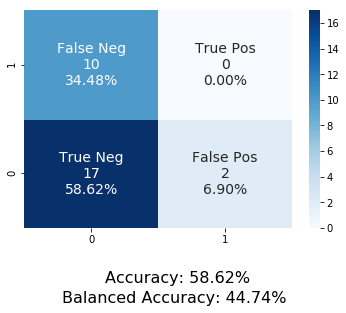

randforest-750-p0.01.tsv


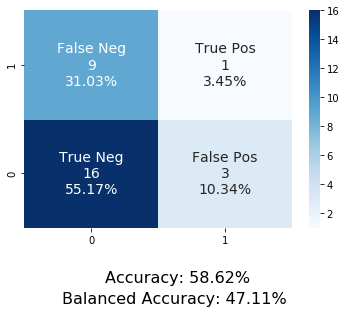

randforest-750.tsv


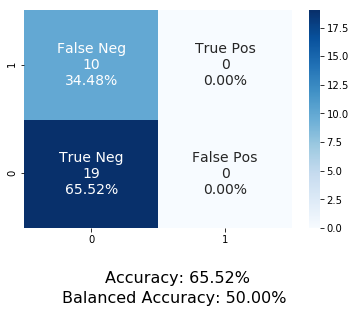

songbird-1000ftrs-data.tsv


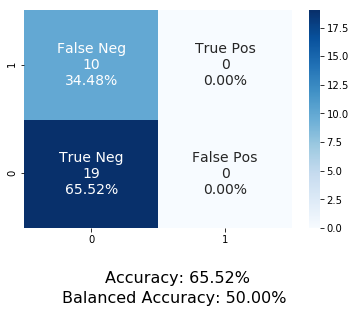

songbird-100ftrs-data.tsv


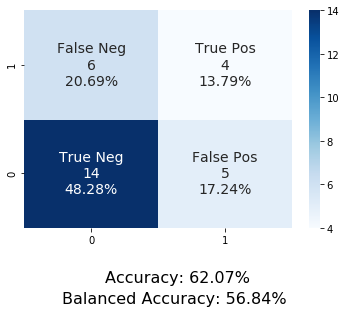

songbird-20ftrs-data.tsv


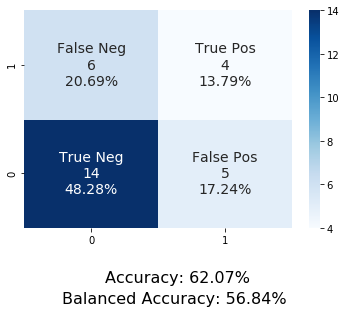

songbird-5ftrs-data.tsv


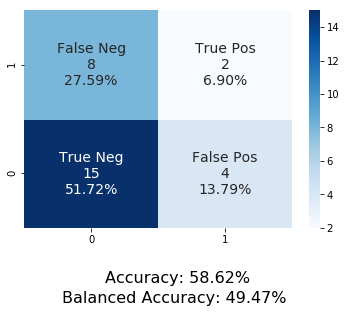

svm-750-p0.01.tsv


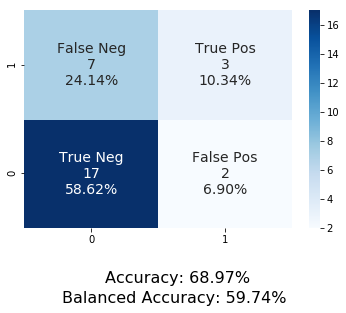

svm-750.tsv


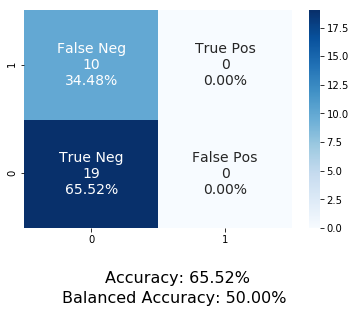

In [21]:
fnames = []
for f in os.scandir(CLASSIFIER_RESULTS_LOC):
    fnames.append(f.name)
    
for filename in sorted(fnames):
    fig, ax = pyplot.subplots(1)
    
    print("=" * 79)
    print(filename)
    
    tp, fp, tn, fn = get_vals(filename)
    
    confusion_matrix(tp, fp, tn, fn, ax)
    
    acc, bacc = get_accs(tp, fp, tn, fn)
    
    ax.text(0.6, -0.5, f"Accuracy: {100*acc:.2f}%", fontsize=16)
    ax.text(0.28, -0.69, f"Balanced Accuracy: {100*bacc:.2f}%", fontsize=16)
    
    # call show() so that we can easily interlace the print stuff (classifier result file name)
    # with images. from https://stackoverflow.com/a/43067920.
    # You could argue we should instead just use this text as the figure titles, but that might
    # be out of place since we'll be shrinking these images down a lot? idk.
    pyplot.show()

## ROC Curve Plots

We could try to extract the threshold information from the logistic regression classifiers being used for the differential abundance/expression log-ratio stuff, or from CoDaCoRe, but it's late, I'm tired, and it's easiest to just show them as points in an ROC plot.

In [15]:
def style_rocplot(ax):
    # Style ROC curve. Based on code from Sara.
    # Also see https://stackoverflow.com/a/38467407.
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()

def plot_rocpoint(filename, ax, label_by_num_ftrs=True, songbird=False):
    tp, fp, tn, fn = get_vals(filename)

    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)

    if label_by_num_ftrs:
        num_features = int(filename.split("-")[1][:-4])
        label = f"{num_features:,} features per side"
    else:
        label = filename.split("-")[1].title()
        
    if songbird and num_features == 20:
        # account for this one point being visually occluded. don't ask.
        size = 100
    else:
        size = 100
    ax.scatter(fpr, tpr, label=label, s=size, alpha=0.5)
    
def diff_abund_rocplot(toolname):

    fig, ax = pyplot.subplots(1)

    sfnames = [filename for filename in fnames if filename.startswith(toolname.lower())]
    ssfnames = sorted(sfnames, key=lambda filename: int(filename.split("-")[1][:-4]))

    for filename in ssfnames:
        plot_rocpoint(filename, ax, songbird=(toolname == "Songbird"))
        
    style_rocplot(ax)
    ax.set_title(f"{toolname} ROC Points")

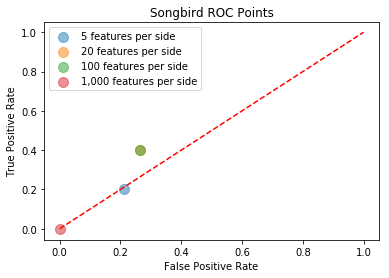

In [16]:
diff_abund_rocplot("Songbird")

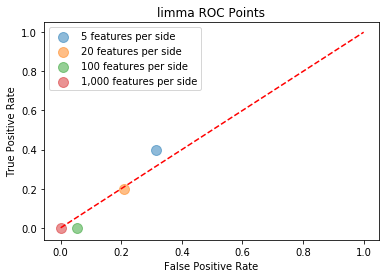

In [17]:
diff_abund_rocplot("limma")

Text(0.5,1,'CoDaCoRe ROC Points')

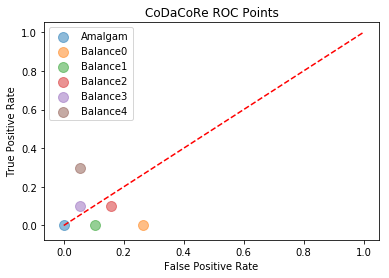

In [18]:
fig, ax = pyplot.subplots(1)

cfnames = [filename for filename in fnames if filename.startswith("codacore")]

for filename in sorted(cfnames):
    plot_rocpoint(filename, ax, label_by_num_ftrs=False)

style_rocplot(ax)
ax.set_title(f"CoDaCoRe ROC Points")

## Autogenerate a LaTeX table for the report

"where we're going, we don't need confusion matrices" - theodore roosevelt

In [62]:
import re
balance_re = re.compile(".*balance([0-9]+).*")
features_re = re.compile(".*-([0-9]+)ftrs-.*")

In [63]:
m = balance_re.match("asdf-balance1337-test.txt")
m.group(1)

'1337'

In [65]:
m = features_re.match("asdf-1000ftrs-data.tsv")
m.group(1)

'1000'

In [71]:
sorted(fnames)

['codacore-amalgam-data.tsv',
 'codacore-balance0-data.tsv',
 'codacore-balance1-data.tsv',
 'codacore-balance2-data.tsv',
 'codacore-balance3-data.tsv',
 'codacore-balance4-data.tsv',
 'limma-1000ftrs-data.tsv',
 'limma-100ftrs-data.tsv',
 'limma-20ftrs-data.tsv',
 'limma-5ftrs-data.tsv',
 'logreg-750-p0.01.tsv',
 'logreg-750.tsv',
 'randforest-750-p0.01.tsv',
 'randforest-750.tsv',
 'songbird-1000ftrs-data.tsv',
 'songbird-100ftrs-data.tsv',
 'songbird-20ftrs-data.tsv',
 'songbird-5ftrs-data.tsv',
 'svm-750-p0.01.tsv',
 'svm-750.tsv']

In [72]:
sfnames = ['codacore-amalgam-data.tsv',
 'codacore-balance0-data.tsv',
 'codacore-balance1-data.tsv',
 'codacore-balance2-data.tsv',
 'codacore-balance3-data.tsv',
 'codacore-balance4-data.tsv',
 'limma-5ftrs-data.tsv',
 'limma-20ftrs-data.tsv',
 'limma-100ftrs-data.tsv',
 'limma-1000ftrs-data.tsv',
 'logreg-750.tsv',
 'logreg-750-p0.01.tsv',
 'randforest-750.tsv',
 'randforest-750-p0.01.tsv',
 'songbird-5ftrs-data.tsv',
 'songbird-20ftrs-data.tsv',
 'songbird-100ftrs-data.tsv',
 'songbird-1000ftrs-data.tsv',
 'svm-750.tsv',
 'svm-750-p0.01.tsv'
          ]

In [74]:
latex = ""
    
prefix2name = {"logreg": "Logistic Regression",
               "randforest": "Random Forest",
               "svm": "Support Vector Machine",
               "codacore": "CoDaCoRe",
               "songbird": "Songbird log-ratio",
               "limma": "limma log-ratio"}

pf = lambda p: f"{100*p:.2f}\%"

for prefix in prefix2name:
    
    name = prefix2name[prefix]
    
    # slow way to do this but whatevs it's like 20 files
    for filename in sfnames:
        
        if filename.startswith(prefix):
            
            # Get stats
            tp, fp, tn, fn = get_vals(filename)
            acc, bacc = get_accs(tp, fp, tn, fn)
            
            # Get results details
            # immensely shoddy way of doing this
            details = ""
            if "amalgam" in filename:
                details = "Amalgam 1/1"
            elif "balance" in filename:
                bnum = int(balance_re.match(filename).group(1))
                details = f"Balance {bnum + 1}/5"
            elif "ftrs" in filename:
                fnum = int(features_re.match(filename).group(1))
                details = f"Top {fnum:,} to bottom {fnum:,} features"
            elif "750" in filename:
                details = "750 biomarkers"
                if "p0.01" in filename:
                    details += " with limma p-value $< 0.01$"
                
            latex += f"{name} & {details} & {tp} & {tn} & {fp} & {fn} & {pf(acc)} & {pf(bacc)} \\\\ \\hline \n"
            
with open("../../paper/autogenerated-table.tex", "w") as tf:
    tf.write(latex)